# Análise dos resultados parciais da extração

## Pré-processamento

Tratando datas e tipos de dados

In [1]:
import pandas as pd
import matplotlib as plt
import plotly

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 4)

In [3]:
repo = pd.read_csv("../../data/repositories_edu.csv",  dtype={'id': object,
                                                                'timestamp_extract': object,
                                                                'commits': pd.Int64Dtype(),
                                                                'contributors': pd.Int64Dtype()})

In [4]:
repo.head(3)[['id', 'url', 'created_at', 'updated_at', 'pushed_at']]

,id,url,created_at,updated_at,pushed_at
0,73385196,https://github.com/prefeiturasp/dados-educacao,2016-11-10T13:35:40Z,2020-02-25T21:59:41Z,2019-10-02T18:43:26Z
1,120380053,https://github.com/turicas/cursos-prouni,2018-02-06T00:30:03Z,2019-11-01T01:04:49Z,2019-11-01T01:04:48Z
2,19895876,https://github.com/inepdadosabertos/api,2014-05-17T20:45:05Z,2019-05-31T17:57:22Z,2014-05-18T09:29:33Z


In [5]:
def conversao_string_datetime(df, coluna):
    df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)
    
    df[coluna + '_month'] = df[coluna].dt.month_name(locale='pt_BR.UTF-8')
    df.astype({coluna + '_month': 'category'}).dtypes

    df[coluna + '_number_month'] = df[coluna].dt.month
    df.astype({coluna + '_number_month': 'category'}).dtypes

    df[coluna + '_year'] = df[coluna].dt.year
    df.astype({coluna + '_year': 'category'}).dtypes

    # df[coluna + '_dia'] = df[coluna].dt.day

    return df

In [6]:
repo = conversao_string_datetime(repo, 'created_at')
repo = conversao_string_datetime(repo, 'updated_at')
repo = conversao_string_datetime(repo, 'pushed_at')

repo.head(1)

,id,full_name,description,owner_type,owner_api_url,owner_url,api_url,url,fork,created_at,...,owner_name,created_at_month,created_at_number_month,created_at_year,updated_at_month,updated_at_number_month,updated_at_year,pushed_at_month,pushed_at_number_month,pushed_at_year
0,73385196,prefeiturasp/dados-educacao,Análises e tutoriais das bases de dados aberto...,Organization,https://api.github.com/users/prefeiturasp,https://github.com/prefeiturasp,https://api.github.com/repos/prefeiturasp/dado...,https://github.com/prefeiturasp/dados-educacao,False,2016-11-10 13:35:40+00:00,...,Prefeitura Municipal de São Paulo,Novembro,11,2016,Fevereiro,2,2020,Outubro,10,2019


In [7]:
len(repo)

389

Verificando se existe algum repositório com número de commits igual a 0

In [8]:
len(repo.loc[repo['commits'].isna()])

0

## Agrupando dados

In [9]:
repo.columns

Index(['id', 'full_name', 'description', 'owner_type', 'owner_api_url',
       'owner_url', 'api_url', 'url', 'fork', 'created_at', 'updated_at',
       'pushed_at', 'size', 'stargazers_count', 'language', 'has_issues',
       'has_wiki', 'forks_count', 'forks', 'open_issues', 'license',
       'timestamp_extract', 'commits', 'contributors', 'owner_location',
       'owner_email', 'owner_blog', 'owner_name', 'created_at_month',
       'created_at_number_month', 'created_at_year', 'updated_at_month',
       'updated_at_number_month', 'updated_at_year', 'pushed_at_month',
       'pushed_at_number_month', 'pushed_at_year'],
      dtype='object')

### 1 - Tipos de usuários do github

In [10]:
owner_type = repo.groupby('owner_type').size().reset_index(name='qtd')
owner_type

,owner_type,qtd
0,Organization,48
1,User,341


In [11]:
total = owner_type['qtd'].sum()
owner_type['% of total'] = owner_type['qtd'].apply(lambda x: 100 * x / total)
owner_type

,owner_type,qtd,% of total
0,Organization,48,12.339332
1,User,341,87.660668


### 2 - Linguagens de Programação

In [16]:
len(repo.loc[repo['language'].isna()])

72

In [17]:
len(repo.loc[repo['language'].isna()]) / len(repo) * 100

18.50899742930591

72 de 389 (19%) repositórios não possuem a informação para Linguagem de programação.

In [18]:
language = repo.groupby('language').size().reset_index(name='qtd').sort_values('qtd', ascending=False)
language

,language,qtd
9,Jupyter Notebook,139
14,R,34
13,Python,33
6,HTML,21
7,Java,21
10,PHP,14
8,JavaScript,12
1,C#,6
0,C,5
20,TSQL,5


In [19]:
total_language = language['qtd'].sum()
language['% of total'] = language['qtd'].apply(lambda x: 100 * x / total_language)
language

,language,qtd,% of total
9,Jupyter Notebook,139,43.848580
14,R,34,10.725552
13,Python,33,10.410095
6,HTML,21,6.624606
7,Java,21,6.624606
10,PHP,14,4.416404
8,JavaScript,12,3.785489
1,C#,6,1.892744
0,C,5,1.577287
20,TSQL,5,1.577287


### 3 - Quantidade de _Stars_ 

Top 15

In [20]:
stargazers_count = repo[['full_name', 'stargazers_count']]

In [22]:
stargazers_count.sort_values('stargazers_count',  ascending=False).head(15)

,full_name,stargazers_count
0,prefeiturasp/dados-educacao,47
1,turicas/cursos-prouni,27
2,inepdadosabertos/api,14
3,erickrf/dicionariosIBGE,12
4,Explicador/MozAPI,8
5,fga-eps-mds/2017.2-MerendaMais,8
6,OpenEnade/API,5
7,bcfurtado/educabrasil,5
8,sjcdigital/sjc-edu,5
12,nazareno/enade-vis,4


### 4 - Commits
Top 15

In [23]:
commits_count = repo[['full_name', 'commits']]

In [24]:
commits_count.sort_values('commits',  ascending=False).head(15)

,full_name,commits
5,fga-eps-mds/2017.2-MerendaMais,1002
87,georgegomesf/educadata,308
6,OpenEnade/API,305
26,repitta/CienciaDeDadosEducacionais,244
21,Krieffer/Analise-da-Insercao-do-Aluno-Negro-co...,170
64,ggpereira/visio-edu,142
259,ruanlas/TADS2015,104
83,voigtjessica/Educacao-no-Brasil,103
16,Lorenaps/caracterizacao-dados-abertos-gov,98
109,martins9/bd_enem_dados_2014,84


### 5 - Quantidade de Forks

In [25]:
forks_count = repo[['full_name', 'forks_count']]

In [26]:
forks_count.sort_values('forks_count',  ascending=False).head(15)

,full_name,forks_count
0,prefeiturasp/dados-educacao,17
3,erickrf/dicionariosIBGE,14
12,nazareno/enade-vis,9
1,turicas/cursos-prouni,9
5,fga-eps-mds/2017.2-MerendaMais,6
7,bcfurtado/educabrasil,5
2,inepdadosabertos/api,4
18,leonardojs1981/analise_enem_2,4
42,gsoare2/analise_desempenho_enem,3
116,bibiacoutinho/Analise-Dados-Inscritos-Comparec...,3


### 6 - Local
A partir do campo _location_ do _owner_ do repositório - Top 15

In [27]:
len(repo.loc[repo['owner_location'].isna()])

193

In [28]:
len(repo.loc[repo['owner_location'].isna()]) / len(repo) * 100

49.61439588688946

50% dos repositórios não possuem informação sobre localidade.

In [29]:
repo['owner_location'] = repo['owner_location'].fillna("Não Informado")

In [30]:
repo.groupby('owner_location').size().reset_index(name='Quantidade').sort_values('Quantidade', ascending=False)

,owner_location,Quantidade
65,Não Informado,193
17,Brazil,18
96,São José dos Campos,11
97,São José dos Campos - SP,10
105,São Paulo,8
...,...,...
41,"Goiânia, Goiás, Brasil",1
40,Goiânia - Goiás - Brasil,1
39,Fortaleza/CE,1
38,"Fortaleza, Ceará, Brasil",1


`owner_location` é um campo preenchido pelo usuário e apresenta grande variação e abreviações.

### 7 - Criação e atualização dos repositórios

In [39]:
created_repo = repo[['full_name', 'created_at_year']]
created_by_year = created_repo.groupby('created_at_year').size().reset_index(name='quantidade').sort_values('created_at_year')
created_by_year

,created_at_year,quantidade
0,2010,1
1,2011,1
2,2012,2
3,2013,4
4,2014,11
5,2015,17
6,2016,24
7,2017,41
8,2018,78
9,2019,154


In [40]:
pushed_repo = repo[['full_name', 'pushed_at_year']]
pushed_by_year = pushed_repo.groupby('pushed_at_year').size().reset_index(name='quantidade').sort_values('pushed_at_year')
pushed_by_year

,pushed_at_year,quantidade
0,2011,1
1,2012,3
2,2013,3
3,2014,9
4,2015,16
5,2016,20
6,2017,34
7,2018,76
8,2019,149
9,2020,78


Adicionando um registro com quantidade 0 para o ano de 2010 a fim de construir o gráfico comparando a quantidade de repositórios por ano, lado a lado.

In [41]:
pushed_by_year = pushed_by_year.append(pd.DataFrame({'pushed_at_year': [2010], 'quantidade': [0]}), ignore_index=True)
pushed_by_year = pushed_by_year.sort_values('pushed_at_year')
pushed_by_year

,pushed_at_year,quantidade
10,2010,0
0,2011,1
1,2012,3
2,2013,3
3,2014,9
4,2015,16
5,2016,20
6,2017,34
7,2018,76
8,2019,149


Text(0, 0.5, 'Quantidade de repositórios')

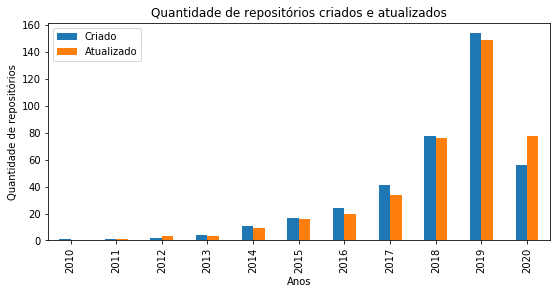

In [42]:
created_pushed = pd.DataFrame({'Criado': created_by_year['quantidade'].values, 
                   'Atualizado': pushed_by_year['quantidade'].values}, index=created_by_year['created_at_year'])

ax = created_pushed.plot.bar(title = "Quantidade de repositórios criados e atualizados")
ax.set_xlabel("Anos")
ax.set_ylabel("Quantidade de repositórios")

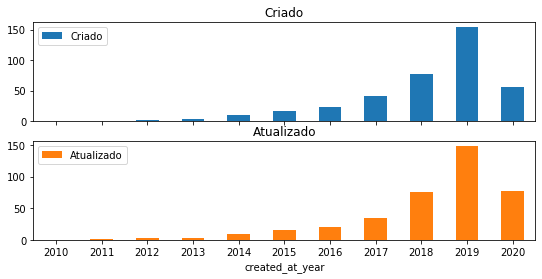

In [43]:
axes = created_pushed.plot.bar(rot=0, subplots=True)

axes[1].legend(loc=2) 

Percebemos como a criação e atualização desses repositórios cresce com o tempo e que em 2020 já temos mais repositórios atualizados do que criados, o que pode indicar que projetos criandos anteriormente continuam em desenvolvimento.

*Todo:* pesquisar por quantidade de usuário na ferramenta ao longo desses anos.
[url](https://api.github.com/search/users?q=mike+in:name+created%3A%3C2011-01-01+type%3Auser&type=Users)